## Data Analysis & Machine Learning Report

# San Francisco Employee Salary Analysis

## Introduction:

This project will analyze San Francisco city employee salary dataset from the years 2011 to the year 2018.

##### This dataset includes:

    Employee name

    Job title

    Base pay

    Overtime pay

    Other pay

    Benefits

    Total pay

    Total pay with benefits

    Year
    

##### The main goals of the analysis:

    Data Cleaning & Preprocessing

    Exploratory Data Analysis 

    Salary Trends Over Time

    Employee Level Insights

    Clustering High Level Patterns

    Machine Learning Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

## Data Preprocessing:

Importing the Dataset:

This dataset was loaded from a CSV file named Total.csv using python function called pandas:

In [2]:
data = pd.read_csv('Total.csv', sep = ',', low_memory = False)
data

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,Not Provided,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.00,0.00,0.00,0.00,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.00,0.00,0.00,0.00,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.00,0.00,0.00,0.00,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.00,0.00,0.00,0.00,0.00,0.00,2018


## Exploratory Data Analysis (EDA):

In [3]:
data.shape

(312882, 9)

In [4]:
data.dtypes

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [6]:
data.describe()

,TotalPay,TotalPayBenefits,Year
count,312882.000000,312882.000000,312882.000000
mean,78802.645788,100928.339777,2014.625303
std,53230.758542,66485.186495,2.290899
min,-618.130000,-3628.780000,2011.000000
25%,38803.000000,48955.072500,2013.000000
50%,74908.790000,100011.290000,2015.000000
75%,111386.897500,142376.300000,2017.000000
max,592394.340000,712802.360000,2018.000000


In [7]:
data.describe(include = 'object')

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits
count,312882,312882,312882,312882,312882,312882
unique,130283,2286,235640,138790,160667,238359
top,Kevin Lee,Transit Operator,0.00,0.00,0.00,Not Provided
freq,29,17995,3246,160116,94330,36160


Missing Data Check:

This notebook tells zero missing values for all columns.

In [8]:
data.isna().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [9]:
data.EmployeeName.value_counts()[:6000]

Kevin Lee          29
Steven Lee         29
Michael Wong       25
Victor Lee         23
William Wong       22
                   ..
Fabian Fowler       6
Ying K Wong         6
Matthew C Lee       6
Chi Chiu Lau        6
Chris Schroeder     6
Name: EmployeeName, Length: 6000, dtype: int64

In [10]:
sum(data.duplicated())

0

In [11]:
data.duplicated('EmployeeName').sum()

182599

In [12]:
data.EmployeeName.nunique()

130283

In [13]:
data.Year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [14]:
data.JobTitle.unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'Tools Room Mechanic/Custodian', 'Pre-Appren Automotive Mechanic',
       'Security-Campus'], dtype=object)

##### Handling Missing or Text Based Numerical Values:

Standardizing Text Column:
All string columns were converted to title case for uniformity.

In [15]:
for col in data.select_dtypes('object').columns:
    data[col] = data[col].str.title()


Some columns contained 'Not Provided' or string values.
A helper function was applied to convert them into floats:

In [16]:
col = ['BasePay', 'TotalPay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']

for ele in col:
    data[ele] = pd.to_numeric(data[ele].astype(str), errors = 'coerce').fillna(0.0)

In [17]:
vals = {'Iii': '3', 'Ii': '2', 'Iv': '4', 'V': '5', 'Vi': '6', 'Vii': '7', 'I': '1', '1t': 'IT', '1s': 'Sales', '5i': '1', 'i': '1', '5ii': '2', 'Instr': 'Instructor'}
data['JobTitle'] = (data['JobTitle'].replace(rf'\b{vals}\b$', regex = True))

In [18]:
name = data['EmployeeName'].value_counts().get('Kevin Lee', 0)
print(name)

38


##### Dataset Summary:

This notebook gives a descriptive summary of all the columns:

    * 312882 total entries with 9 columns

    * 130283 unique employee names

    * Most common employee name was Kevin Lee with (38 occurrences)

    * Most common job title was Transit Operator with (17,995 occurrences)

In [19]:
data.dropna(inplace = True)

In [20]:
cols = ['TotalPay', 'BasePay']
data.drop(data[(data[cols] <= 0.0).any(axis = 1)].index, inplace = True)

In [21]:
cols = ['OvertimePay', 'OtherPay', 'Benefits']
data.drop(data[(data[cols] < 0.0).any(axis = 1)].index, inplace = True)

Converted columns:

    BasePay

    Benefits

    OvertimePay

    OtherPay

In [22]:
data

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,Nathaniel Ford,General Manager-Metropolitan Transit Authority,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011
1,Gary Jimenez,Captain Iii (Police Department),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011
2,Albert Pardini,Captain Iii (Police Department),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011
3,Christopher Chong,Wire Rope Cable Maintenance Mechanic,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011
4,Patrick Gardner,"Deputy Chief Of Department,(Fire Department)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312805,Joseph S Snell,Recreation Leader,17.03,0.00,0.00,0.17,17.03,17.20,2018
312839,Damali V Taylor,"Bdcomm Mbr, Grp5,M$100/Mo",2.76,0.00,0.00,0.02,2.76,2.78,2018
312843,Abby Porth,Commissioner No Benefits,2.00,0.00,0.00,0.02,2.00,2.02,2018
312853,Amanda M Eaken,"Bdcomm Mbr, Grp5,M$100/Mo",0.92,0.00,0.00,0.01,0.92,0.93,2018


## Salary Trends Over Time:

##### Average BasePay, Benefits & TotalPayBenefits by Year:

A merged dataset was created for year over year salary trends

In [23]:
base = data[data['EmployeeName'] == 'Ashok Goswami'][['BasePay', 'Year']]
benefit = data[data['EmployeeName'] == 'Ashok Goswami'][['Benefits', 'Year']]
over_time = data[data['EmployeeName'] == 'Ashok Goswami'][['OvertimePay', 'Year']]
total = data[data['EmployeeName'] == 'Ashok Goswami'][['TotalPayBenefits', 'Year']]

result = pd.merge(base, benefit, on = 'Year', how = 'outer')
result = pd.merge(result, over_time, on = 'Year', how = 'outer')
result = pd.merge(result, total, on = 'Year', how = 'outer')
result

,BasePay,Year,Benefits,OvertimePay,TotalPayBenefits
0,15435.43,2011,0.00,1514.51,16949.94
1,18451.07,2012,1796.52,2557.92,22805.51
2,20066.75,2014,0.00,1941.48,22008.23
3,21761.92,2015,0.00,1942.94,23704.86
4,20821.42,2016,4630.72,1269.41,26721.55
5,13458.03,2017,49.06,471.91,13979.00
6,13380.80,2018,85.91,220.96,13687.67


These above values of the employee 'Ashok Goswami' indicate that there is no significant year over year growth in all salary related categories.

#### Visualization:

This notebook includes a matplotlib line chart visualizing average pay trends.

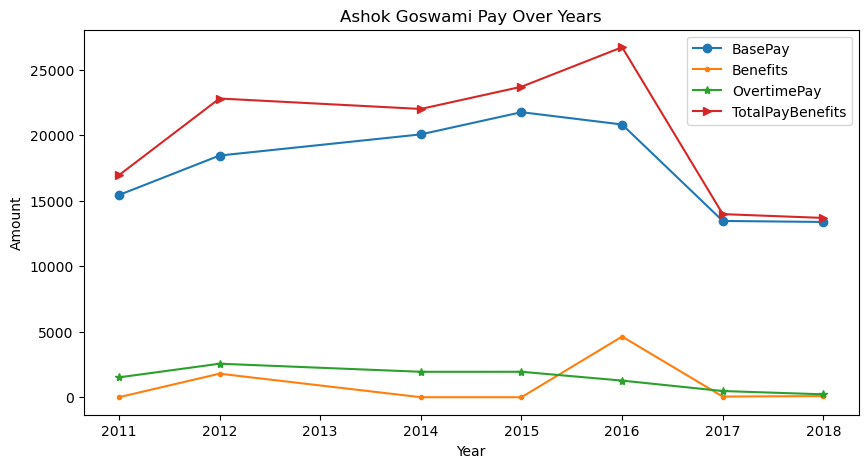

In [24]:
plt.figure(figsize = (10, 5))

plt.plot(result['Year'], result['BasePay'], marker = 'o', label = 'BasePay')
plt.plot(result['Year'], result['Benefits'], marker = '.', label = 'Benefits')
plt.plot(result['Year'], result['OvertimePay'], marker = '*', label = 'OvertimePay')
plt.plot(result['Year'], result['TotalPayBenefits'], marker = '>', label = 'TotalPayBenefits')

plt.title("Ashok Goswami Pay Over Years")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()
plt.show()

##### Average BasePay, Benefits & TotalPayBenefits by Year:
A merged dataset was created for year over year salary trends.

In [25]:
over_time = data['OvertimePay'].max()
data[data['OvertimePay'] == over_time]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
270579,Antonio B Santiago,Deputy Sheriff,105537.56,309481.03,17470.58,57811.14,432489.17,490300.31,2018


In [26]:
base = data[data['EmployeeName'] == 'Antonio B Santiago'][['BasePay', 'Year']]
benefit = data[data['EmployeeName'] == 'Antonio B Santiago'][['Benefits', 'Year']]
over_time = data[data['EmployeeName'] == 'Antonio B Santiago'][['OvertimePay', 'Year']]
total = data[data['EmployeeName'] == 'Antonio B Santiago'][['TotalPayBenefits', 'Year']]

result = pd.merge(base, benefit, on = 'Year', how = 'outer')
result = pd.merge(result, over_time, on = 'Year', how = 'outer')
result = pd.merge(result, total, on = 'Year', how = 'outer')

result

,BasePay,Year,Benefits,OvertimePay,TotalPayBenefits
0,95123.00,2013,36017.44,104672.83,254793.35
1,94191.04,2014,38238.57,173547.73,325718.15
2,97802.93,2015,43272.94,214393.66,373478.52
3,102547.00,2016,47981.01,268942.15,436446.02
4,106349.01,2017,49902.79,204358.05,377450.64
5,105537.56,2018,57811.14,309481.03,490300.31


These above values of the employee 'Antonio B Santiago' indicate that there is a significant year over year growth in all salary related categories.

#### Visualization:
This notebook includes a matplotlib line chart visualizing average pay trends.

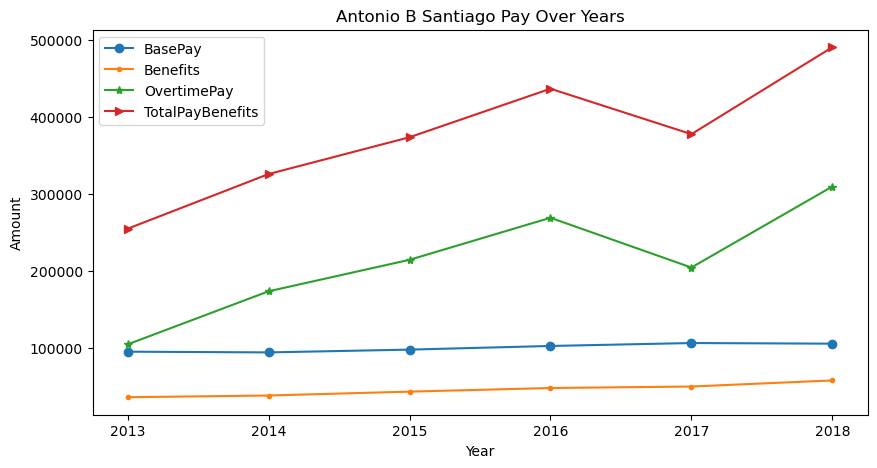

In [27]:
plt.figure(figsize = (10, 5))

plt.plot(result['Year'], result['BasePay'], marker = 'o', label = 'BasePay')
plt.plot(result['Year'], result['Benefits'], marker = '.', label = 'Benefits')
plt.plot(result['Year'], result['OvertimePay'], marker = '*', label = 'OvertimePay')
plt.plot(result['Year'], result['TotalPayBenefits'], marker = '>', label = 'TotalPayBenefits')

plt.title("Antonio B Santiago Pay Over Years")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()
plt.show()

## High Earning Employees Analysis:

##### One of the highest earners of this project are listed in the notebook:

    Antonio B. Santiago, Deputy Sheriff in the year 2018:

    BasePay: 105537

    Overtime: 309481

    OtherPay: 17470
    
    Benefits: 57811

    TotalPayBenefits: 490300

This graphs reports, the key analyses performed on the San Francisco employee salary dataset:
##### Yearly trends in compensation metrics:

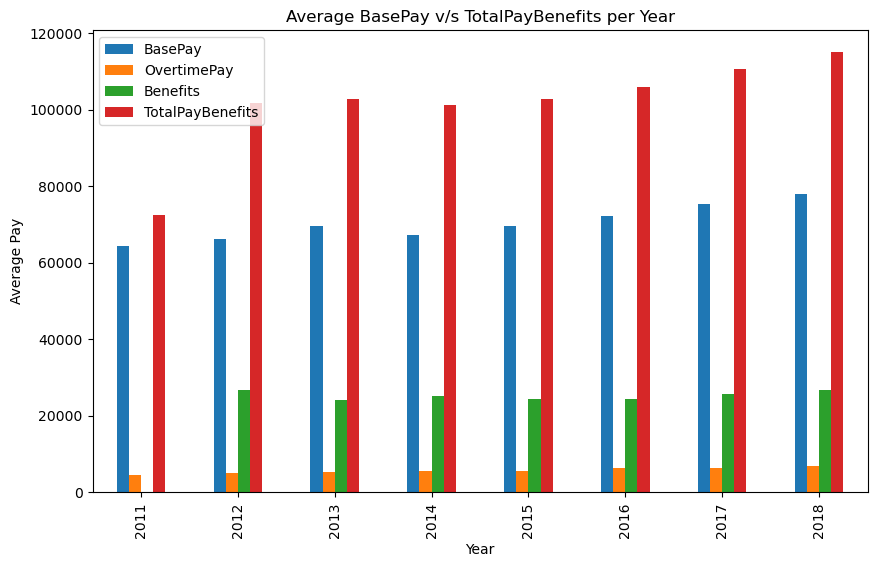

In [31]:
data.groupby('Year')[['BasePay', 'OvertimePay', 'Benefits', 'TotalPayBenefits']].mean().plot(kind = 'bar', figsize = (10, 6))
plt.title('Average BasePay v/s TotalPayBenefits per Year')
plt.xlabel('Year')
plt.ylabel('Average Pay')
plt.legend()
plt.show()

From the above graph, TotalPayBenefits exhibits the growth, indicating increasing city spending on employee.

In some years, OvertimePay contributes significantly, especially in departments like Police and Fire

##### The below pie chart shows the proportion of job titles represented in each year.

<AxesSubplot:title={'center':'Distribution of Job Titles by Year'}, ylabel='JobTitle'>

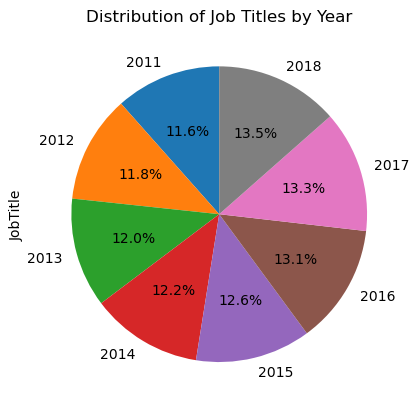

In [32]:
data.groupby('Year')['JobTitle'].size().plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90, title = 'Distribution of Job Titles by Year')

The above graph, contains 312882 total entries over multiple years.

Job title counts reflect annual staffing levels, not the variety of job roles.

Some years have higher representation, due to larger workforce size.

## Job Title Insights:

##### Number of Unique Job Titles:

2286 unique job titles were identified.

    General Manager: Metropolitan Transit Authority

    Captain III: Police Department

    Maintenance Mechanics

    Security: Campus

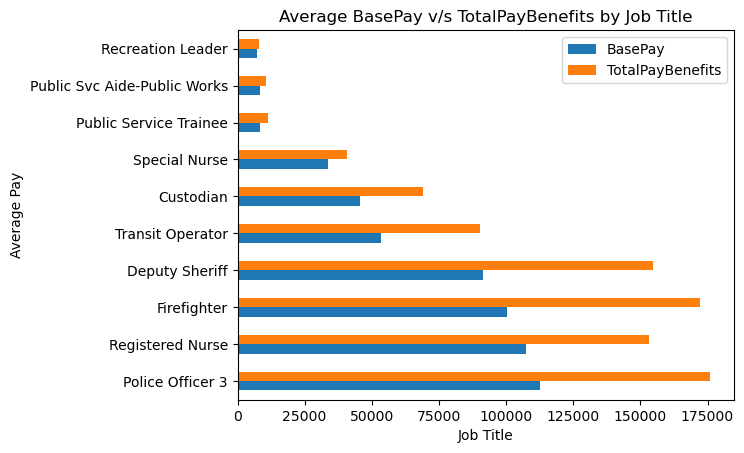

In [33]:
job = data['JobTitle'].value_counts()[:10].index

df = data[data['JobTitle'].isin(job)]

base = df.groupby('JobTitle')['BasePay'].mean().sort_values(ascending = False)

total_pay = df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending = False)

combined = pd.concat([base, total_pay], axis = 1)

combined.columns = ['BasePay', 'TotalPayBenefits']

combined.plot(kind = 'barh', title = 'Average BasePay v/s TotalPayBenefits by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Pay')
plt.legend()
plt.show()

## Machine Learning Classification:

##### Model Used:

     * Random Forest Classifier


##### Target Labels:

    Salary 

    Very Low

    Low
    
    Medium

    High

    Very High

Creating two variables (numerical and categorial) from the dataset for better analysis.

A copy of the dataset is created to avoid modifying the original.

#### A StandardScaler is applied to numerical columns to normalize their distribution.

Categorical columns are converted to dummy variables using one hot encoding:

In [35]:
num_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay']
cat_cols = ['JobTitle'] 

data[num_cols] = data[num_cols].fillna(0.00)
data[cat_cols] = data[cat_cols].fillna('Not Applicable')

from sklearn.preprocessing import StandardScaler

df = data.copy()  
s = StandardScaler()
df[num_cols] = s.fit_transform(data[num_cols])

new_data = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [36]:
X = new_data.drop('EmployeeName', axis = 1)
y = pd.qcut(data['TotalPayBenefits'], q = 5, labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41)

In [38]:
ran_forest = RandomForestClassifier(n_estimators = 30, random_state = 42)
ran_forest.fit(X_train, y_train)

pred = ran_forest.predict(X_test)

print('Classification Report:', classification_report(y_test, pred))
print('Confusion Matrix:', confusion_matrix(y_test, pred))

Classification Report:               precision    recall  f1-score   support

        High       1.00      1.00      1.00     15398
         Low       1.00      1.00      1.00     15828
      Medium       1.00      1.00      1.00     15382
   Very High       1.00      1.00      1.00     15455
    Very Low       1.00      1.00      1.00     15188

    accuracy                           1.00     77251
   macro avg       1.00      1.00      1.00     77251
weighted avg       1.00      1.00      1.00     77251

Confusion Matrix: [[15395     0     2     1     0]
 [    0 15827     1     0     0]
 [    0     1 15381     0     0]
 [    2     0     0 15453     0]
 [    0     0     0     0 15188]]


##### Model Performance:

    The model achieved 100% accuracy across all classes


##### Classification Report:

    Precision: 1.00

    Recall: 1.00

    F1-score: 1.00

##### Confusion Matrix:
    Showed almost perfect diagonal classification.

This implies perfect performance which strongly implies highly separable features or may be beacuse of overfitting which is not suitable for the final project report.

## Clustering Analysis: K-Means

A K-Means clustering model was applied to numerical salary features.

##### Cluster distribution:
    Cluster     Count
    1           148359
    0           105772
    2           54872

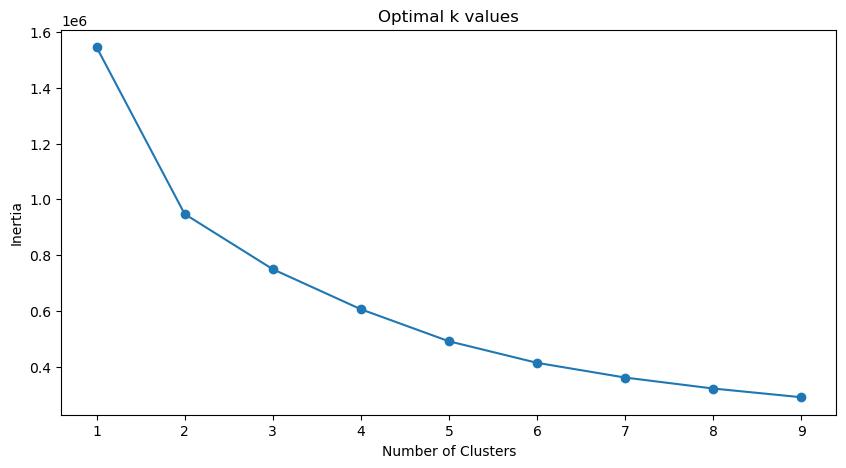

In [64]:
df = data[['BasePay', 'OvertimePay', 'Benefits', 'TotalPayBenefits', 'Year']].copy()

df = df.fillna(0.00)

s = StandardScaler()
X = s.fit_transform(df)

i = []
k_range = range(1, 10)

for ele in k_range:
    kmeans = KMeans(n_clusters = ele, random_state = 42)
    kmeans.fit(X)
    i.append(kmeans.inertia_)

plt.figure(figsize = (10, 5))
plt.plot(k_range, i, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Optimal k values')
plt.show()

#### Cluster means salary patterns:


##### These clusters likely represent:

    Cluster 1: Mid to high salary employees

    Cluster 0: Lower salary employees

    Cluster 2: High overtime or high benefit employees

In [70]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
df['Cluster'] = kmeans.fit_predict(X)

df.sample(10)

,BasePay,OvertimePay,Benefits,TotalPayBenefits,Year,Cluster
127233,66239.22,6631.08,35248.60,108998.26,2014,1
54230,62188.91,3425.28,32030.54,102785.55,2012,1
290580,79976.03,5583.03,31355.99,117539.05,2018,1
90077,72711.00,5214.00,27632.33,107566.13,2013,1
151233,140321.26,8695.36,44137.08,206291.42,2015,2
205644,66419.32,16226.44,28834.44,113239.22,2016,1
226996,3021.66,0.00,1145.78,4170.00,2016,0
169788,62027.56,5968.80,26184.41,95614.51,2015,1
116348,104307.03,23964.89,36793.56,169666.48,2014,2
268976,2131.30,0.00,384.65,2586.31,2017,0


In [71]:
df['Cluster'].value_counts()

1    148359
0    105772
2     54872
Name: Cluster, dtype: int64

In [72]:
df.groupby('Cluster')[['BasePay', 'Benefits', 'TotalPayBenefits']].mean()

,BasePay,Benefits,TotalPayBenefits
Cluster,,,
0,27088.239492,3602.664008,33336.133300
1,79359.850927,28677.112249,114460.832068
2,130472.258254,41496.071212,201292.379663


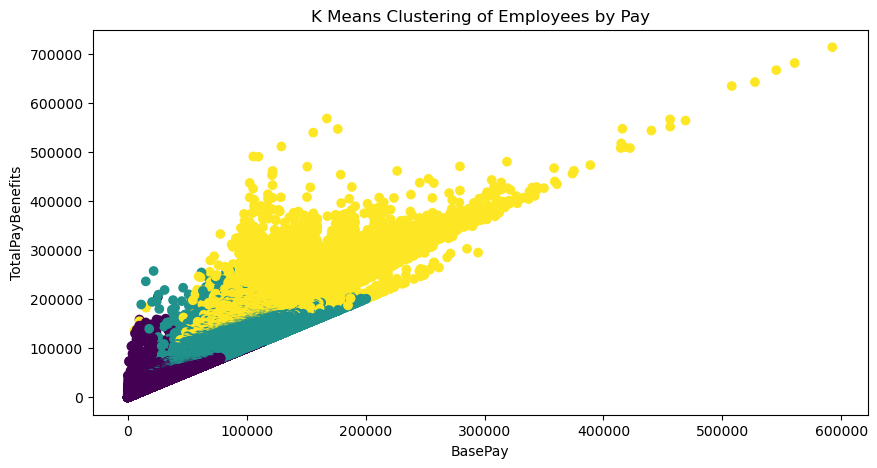

In [73]:
plt.figure(figsize = (10, 5))
plt.scatter(df['BasePay'], df['TotalPayBenefits'], c = df['Cluster'])
plt.xlabel('BasePay')
plt.ylabel('TotalPayBenefits')
plt.title('K Means Clustering of Employees by Pay')
plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

print('Explained variance ratio:', pca.explained_variance_ratio_)

pca_df = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
pca_df['EmployeeName'] = data['EmployeeName']  
pca_df['TotalPayBenefits'] = data['TotalPayBenefits']

pca_df

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['TotalPayBenefits'], cmap='viridis', alpha=0.6)
plt.colorbar(label='TotalPayBenefits')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Employee Salaries')
plt.show()

## Summary:

* Salary Growth

Employee compensation with base pay + benefits has increased significantly from the year 2011 to the year 2018.

* Overtime is a Major Contributor

Some employees earn more in overtime than base salary for example: police & sheriff positions.

* Job Titles Have Wide Pay Variation

Transit operators and police ranks appear more often and show large pay variance.

* Machine Learning Easily Classifies Salary Levels

Because salary categories are highly separable by numeric values, classification is near perfect.

* Clustering Identifies Distinct Earning Groups

Clusters naturally group employees by compensation structure.

##### For Further Analysis:

Add more features such as department, experiance.

Examine outliers more deeply.

Address the possibility of model overfitting.